In [63]:
#Importing all Necessary Libraries

import pandas as pd 
from matplotlib import pyplot as plt
import datetime
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
import numpy as np
from fbprophet import Prophet
df = pd.read_excel("Sample Data BT free 2019010.xlsx")
df.head(5)


,Datetime,Reg/Trx,Temp,Label,T comp. ° F,Reg. out,Reg/Trx.1,chlorine,Label.1,T comp. ° F.1,Reg. out.1,Reg/Trx.2,PH_level,Label.2,T comp. ° F.2,Reg. out.2,Mode,Value,Raw
0,2018-12-04 12:44:00,T,1.556,ppm Free Cl2,--,--,T,2.205,ppm Free Cl2,--,--,T,6.999,pH,51.1,--,M,0,0
1,2018-12-04 12:45:00,T,1.554,ppm Free Cl2,--,--,T,2.207,ppm Free Cl2,--,--,T,6.999,pH,51.0,--,M,0,0
2,2018-12-04 12:46:00,T,1.554,ppm Free Cl2,--,--,T,2.211,ppm Free Cl2,--,--,T,6.999,pH,51.0,--,M,0,0
3,2018-12-04 12:47:00,T,1.552,ppm Free Cl2,--,--,T,2.207,ppm Free Cl2,--,--,T,6.999,pH,51.0,--,M,0,0
4,2018-12-04 12:48:00,T,1.550,ppm Free Cl2,--,--,T,2.201,ppm Free Cl2,--,--,T,6.999,pH,50.9,--,M,0,0


In [84]:
#Corrolation between Temperature and Chlorine Levels
(corr,pval) = stats.pearsonr(df["Temp"], df["chlorine"])
corr

0.5329792068742414

In [64]:
#Created new columns for Date and Time
df["Date"]=[d.date() for d in df['Datetime']]
df['Time'] = [d.time() for d in df['Datetime']]
df["Date"] = df["Date"].astype(str)
df.head(5)

,Datetime,Reg/Trx,Temp,Label,T comp. ° F,Reg. out,Reg/Trx.1,chlorine,Label.1,T comp. ° F.1,...,Reg/Trx.2,PH_level,Label.2,T comp. ° F.2,Reg. out.2,Mode,Value,Raw,Date,Time
0,2018-12-04 12:44:00,T,1.556,ppm Free Cl2,--,--,T,2.205,ppm Free Cl2,--,...,T,6.999,pH,51.1,--,M,0,0,2018-12-04,12:44:00
1,2018-12-04 12:45:00,T,1.554,ppm Free Cl2,--,--,T,2.207,ppm Free Cl2,--,...,T,6.999,pH,51.0,--,M,0,0,2018-12-04,12:45:00
2,2018-12-04 12:46:00,T,1.554,ppm Free Cl2,--,--,T,2.211,ppm Free Cl2,--,...,T,6.999,pH,51.0,--,M,0,0,2018-12-04,12:46:00
3,2018-12-04 12:47:00,T,1.552,ppm Free Cl2,--,--,T,2.207,ppm Free Cl2,--,...,T,6.999,pH,51.0,--,M,0,0,2018-12-04,12:47:00
4,2018-12-04 12:48:00,T,1.550,ppm Free Cl2,--,--,T,2.201,ppm Free Cl2,--,...,T,6.999,pH,50.9,--,M,0,0,2018-12-04,12:48:00


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


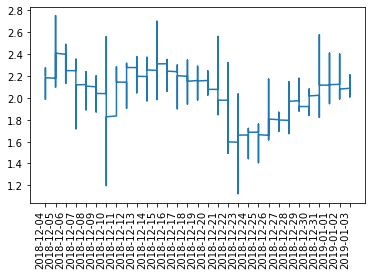

In [65]:
#Visualization of Chorine level as a function of Day with the upper concentration and lower concentration of chlorine per day
plt.plot(df["Date"],df["chlorine"])
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize']=10
plt.show()

In [66]:
# Training and fitting our Model with the top 30000 rows
df1 = df[["Datetime","chlorine"]]
df1 = df1.rename(columns={'Datetime': 'ds',"chlorine":"y"})
df1["ds"] =pd.to_datetime(df1["ds"])
train = df1.drop(df1.index[-10080:])
model = Prophet()
model.fit(train)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [67]:
# Testing Our model with the bottom 10000 rows
test = df1.drop(df1.index[:-10080])
test_X = test["ds"]
test_X = pd.DataFrame(test_X)
forcast = model.predict(test_X)

    

In [74]:
y_pred = forcast["yhat"].values
y_true = test["y"].values


10080

In [71]:
#Evaluating our model with scikit learn mean_square_method, a mean square of below 20 percent is a good eve
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 0.123


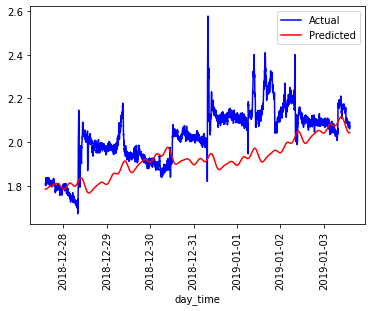

In [82]:
test_X.astype(str)
fig,ax = plt.subplots()
ax.plot(test_X,y_true,color="b",label="Actual")
ax.set_xlabel("day_time")
ax.plot(test_X,y_pred,color="r",label="Predicted")
plt.xticks(rotation=90)
plt.legend()
plt.show()